In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 1})

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from visual_behavior.data_access import loading
import visual_behavior.ophys.response_analysis.utilities as ut
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

C:\Users\marinag\Documents\Code\visual_behavior_analysis\visual_behavior\data_access\from_lims.py:37: UserWarning: failed to set up LIMS/mtrain credentials
'LIMS_DBNAME'

         internal AIBS users should set up environment variables         appropriately
functions requiring database access will fail
  warnings.warn(warn_string)
C:\Users\marinag\Documents\Code\visual_behavior_analysis\visual_behavior\data_access\loading.py:54: UserWarning: failed to set up LIMS/mtrain credentials
'LIMS_DBNAME'

internal AIBS users should set up environment variables appropriately
functions requiring database access will fail
  warnings.warn(warn_string)


### Get cache and experiment metadata

In [6]:
cache_dir = loading.get_platform_analysis_cache_dir()
cache = VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=cache_dir)
print(cache_dir)

experiments_table = cache.get_ophys_experiment_table()

\\allen\programs\braintv\workgroups\nc-ophys\visual_behavior\platform_paper_cache_new


c:\users\marinag\documents\code\allensdk\allensdk\brain_observatory\behavior\behavior_project_cache\behavior_project_cache.py:135: UpdatedStimulusPresentationTableWarning: 
	As of AllenSDK version 2.16.0, the latest Visual Behavior Ophys data has been significantly updated from previous releases. Specifically the user will need to update all processing of the stimulus_presentations tables. These tables now include multiple stimulus types delineated by the columns `stimulus_block` and `stimulus_block_name`.

The data that was available in previous releases are stored in the block name containing 'change_detection' and can be accessed in the pandas table by using: 
	`stimulus_presentations[stimulus_presentations.stimulus_block_name.str.contains('change_detection')]`
  warnings.warn(


In [7]:
platform_experiments = loading.get_platform_paper_experiment_table()

c:\users\marinag\documents\code\allensdk\allensdk\brain_observatory\behavior\behavior_project_cache\behavior_project_cache.py:135: UpdatedStimulusPresentationTableWarning: 
	As of AllenSDK version 2.16.0, the latest Visual Behavior Ophys data has been significantly updated from previous releases. Specifically the user will need to update all processing of the stimulus_presentations tables. These tables now include multiple stimulus types delineated by the columns `stimulus_block` and `stimulus_block_name`.

The data that was available in previous releases are stored in the block name containing 'change_detection' and can be accessed in the pandas table by using: 
	`stimulus_presentations[stimulus_presentations.stimulus_block_name.str.contains('change_detection')]`
  warnings.warn(


removing 1 problematic experiments


In [10]:
ophys_experiment_id = platform_experiments[platform_experiments.cre_line=='Vip-IRES-Cre'].index.values[20]

dataset = loading.get_ophys_dataset(ophys_experiment_id)
dataset.metadata

c:\users\marinag\documents\code\allensdk\allensdk\brain_observatory\behavior\behavior_project_cache\behavior_project_cache.py:135: UpdatedStimulusPresentationTableWarning: 
	As of AllenSDK version 2.16.0, the latest Visual Behavior Ophys data has been significantly updated from previous releases. Specifically the user will need to update all processing of the stimulus_presentations tables. These tables now include multiple stimulus types delineated by the columns `stimulus_block` and `stimulus_block_name`.

The data that was available in previous releases are stored in the block name containing 'change_detection' and can be accessed in the pandas table by using: 
	`stimulus_presentations[stimulus_presentations.stimulus_block_name.str.contains('change_detection')]`
  warnings.warn(


{'equipment_name': 'CAM2P.3',
 'sex': 'M',
 'age_in_days': 134,
 'stimulus_frame_rate': 60.0,
 'session_type': 'OPHYS_3_images_B',
 'date_of_acquisition': datetime.datetime(2019, 8, 28, 11, 5, 2, 180000, tzinfo=tzutc()),
 'reporter_line': 'Ai148(TIT2L-GC6f-ICL-tTA2)',
 'cre_line': 'Vip-IRES-Cre',
 'behavior_session_uuid': UUID('64623995-c230-4607-bef5-b2ce9ddf22ee'),
 'driver_line': ['Vip-IRES-Cre'],
 'mouse_id': '467951',
 'project_code': 'VisualBehaviorTask1B',
 'full_genotype': 'Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt',
 'behavior_session_id': 933830753,
 'indicator': 'GCaMP6f',
 'emission_lambda': 520.0,
 'excitation_lambda': 910.0,
 'ophys_container_id': 928325203,
 'field_of_view_height': 512,
 'field_of_view_width': 452,
 'imaging_depth': 175,
 'targeted_imaging_depth': 175,
 'imaging_plane_group': None,
 'imaging_plane_group_count': 0,
 'ophys_experiment_id': 934476801,
 'ophys_frame_rate': 31.0,
 'ophys_session_id': 933463604,
 'targeted_structure': 'VISp'}

In [13]:
data_type = 'events'
event_type = 'omissions'
time_window = [-1., 1.5]
interpolate = False
output_sampling_rate = None
epoch_duration_mins = 5
load_from_file = False

df = loading.get_stimulus_response_df(dataset, data_type=data_type, event_type=event_type, time_window=time_window,
                                        interpolate=interpolate, output_sampling_rate=output_sampling_rate,
                                        epoch_duration_mins=epoch_duration_mins, load_from_file=load_from_file)

generating response df


c:\users\marinag\documents\code\mindscope_utilities\mindscope_utilities\visual_behavior_ophys\data_formatting.py:644: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # load data for one experiment
100%|██████████| 17/17 [00:00<00:00, 77.13it/s]
c:\users\marinag\documents\code\mindscope_utilities\mindscope_utilities\visual_behavior_ophys\data_formatting.py:644: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # load data for one experiment


annotating stim presentations
adding reward rate
adding epochs
Pandas requires version '1.7.1' or newer of 'scipy' (version '1.4.1' currently installed).


In [14]:
conditions = ['cell_specimen_id', 'omitted']
response_window_duration = 0.75
get_pref_stim=False

mdf = ut.get_mean_df(df, conditions=conditions, frame_rate=output_sampling_rate,
                        window_around_timepoint_seconds=time_window,
                        response_window_duration_seconds=response_window_duration,
                        get_pref_stim=get_pref_stim, exclude_omitted_from_pref_stim=True)

unsupported operand type(s) for *: 'float' and 'NoneType'
failed to compute reliability
unsupported operand type(s) for *: 'float' and 'NoneType'


In [16]:
mdf.head()

,cell_specimen_id,omitted,mean_response,sem_response,mean_trace,sem_trace,trace_timestamps,mean_responses,mean_baseline,sem_baseline,response_window_duration,fano_factor,fraction_significant_p_value_gray_screen
0,1086491848,True,0.002989,0.001039,"[0.0021252865351506873, 0.0, 0.0, 0.0007744752...","[0.0021199666606365178, 0.0, 0.0, 0.0007725366...","[-0.9695587186426659, -0.9372400946879128, -0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000562,0.000480,0.75,9.830145,1.0
1,1086491953,True,0.000918,0.000596,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0020597120572...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0020545563244...","[-0.9695587186426659, -0.9372400946879128, -0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000509,0.000508,0.75,18.349449,1.0
2,1086492030,True,0.000428,0.000153,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.9695587186426659, -0.9372400946879128, -0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000030,0.000030,0.75,10.113596,1.0
3,1086492071,True,0.000985,0.000276,"[0.0, 0.0009077564813794331, 0.0, 0.0, 0.0, 0....","[0.0, 0.0009054842463228927, 0.0, 0.0, 0.0, 0....","[-0.9695587186426659, -0.9372400946879128, -0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000178,0.000177,0.75,7.916935,1.0
4,1086492168,True,0.003182,0.001155,"[0.0, 0.0, 0.0027743146540318816, 0.0008233378...","[0.0, 0.0, 0.002767370175921204, 0.00082127693...","[-0.9695587186426659, -0.9372400946879128, -0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000265,0.000148,0.75,10.264235,1.0


Text(0.5, 1.0, 'Average omission response')

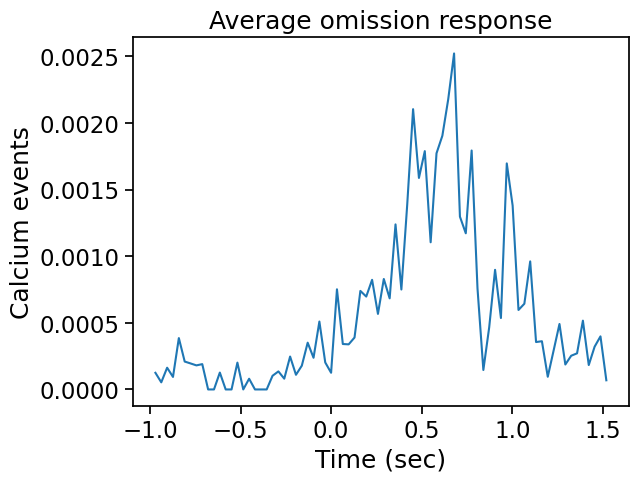

In [18]:
plt.plot(mdf.trace_timestamps.values[0], mdf.mean_trace.mean())
plt.xlabel('Time (sec)')
plt.ylabel('Calcium events')
plt.title('Average omission response')

### Generate mean dataframe for behavior data types

In [24]:
data_type = 'running_speed'
event_type = 'omissions'
time_window = [-1., 1.5]
interpolate = False
output_sampling_rate = None
epoch_duration_mins = 5
load_from_file = False

df = loading.get_stimulus_response_df(dataset, data_type=data_type, event_type=event_type, time_window=time_window,
                                        interpolate=interpolate, output_sampling_rate=output_sampling_rate,
                                        epoch_duration_mins=epoch_duration_mins, load_from_file=load_from_file)

df['ophys_experiment_id'] = ophys_experiment_id

c:\users\marinag\documents\code\mindscope_utilities\mindscope_utilities\visual_behavior_ophys\data_formatting.py:644: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # load data for one experiment


generating response df


100%|██████████| 1/1 [00:00<00:00, 66.84it/s]


annotating stim presentations


c:\users\marinag\documents\code\mindscope_utilities\mindscope_utilities\visual_behavior_ophys\data_formatting.py:644: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # load data for one experiment


adding reward rate
adding epochs
Pandas requires version '1.7.1' or newer of 'scipy' (version '1.4.1' currently installed).


In [25]:
df.head()

,stimulus_presentations_id,trace_id,trace,trace_timestamps,mean_response,baseline_response,p_value_gray_screen,ophys_frame_rate,data_type,event_type,...,response_time,response_latency,reward_time,reward_volume,time_from_last_change,pre_change,licked,lick_on_next_flash,rewarded,ophys_experiment_id
0,2,0,"[-0.20332851373255093, -0.17330345258712143, -...","[-0.9841433621200228, -0.9674629661518869, -0....",1.094709,-1.127745,0.3223,31.0,running_speed,omissions,...,NaN,NaN,NaN,0.000,NaN,False,True,True,False,934476801
1,7,0,"[0.1348895618482138, 0.16879867607995236, 0.22...","[-0.9841433621200228, -0.9674629661518869, -0....",0.067047,0.165602,0.8077,31.0,running_speed,omissions,...,NaN,NaN,NaN,0.000,NaN,False,False,True,False,934476801
2,49,0,"[0.0681083078337129, 0.00042857957568484995, -...","[-0.9841433621200228, -0.9674629661518869, -0....",0.028787,-0.015830,0.8478,31.0,running_speed,omissions,...,NaN,NaN,NaN,0.000,9.75795,False,False,True,False,934476801
3,59,0,"[0.12936641598849247, 0.12719002324959705, 0.1...","[-0.9841433621200228, -0.9674629661518869, -0....",0.091160,0.192322,0.8028,31.0,running_speed,omissions,...,NaN,NaN,NaN,0.000,17.26407,False,False,False,False,934476801
4,72,0,"[0.1804544112636597, 0.1758716481256966, 0.165...","[-0.9841433621200228, -0.9674629661518869, -0....",0.280020,0.007087,0.4988,31.0,running_speed,omissions,...,361.72546,0.44549,361.40854,0.005,27.02205,False,False,False,True,934476801


Text(0.5, 1.0, 'Average omission running speed')

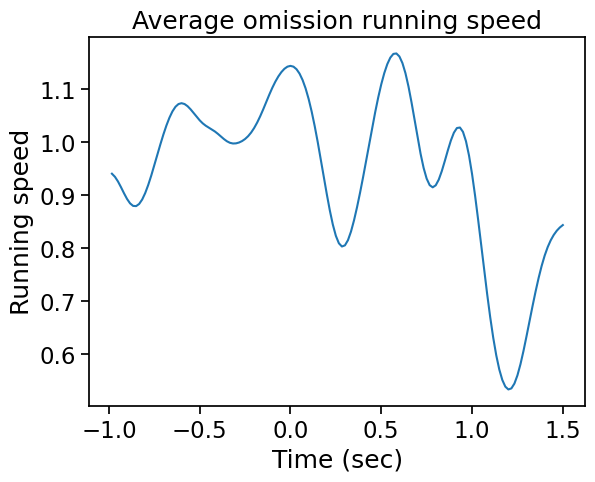

In [26]:
plt.plot(df.trace_timestamps.values[0], df.trace.mean())
plt.xlabel('Time (sec)')
plt.ylabel('Running speed')
plt.title('Average omission running speed')

In [27]:
conditions = ['ophys_experiment_id', 'omitted']
response_window_duration = 0.75
get_pref_stim=False

mdf = ut.get_mean_df(df, conditions=conditions, frame_rate=output_sampling_rate,
                        window_around_timepoint_seconds=time_window,
                        response_window_duration_seconds=response_window_duration,
                        get_pref_stim=get_pref_stim, exclude_omitted_from_pref_stim=True)

unsupported operand type(s) for *: 'float' and 'NoneType'
failed to compute reliability
unsupported operand type(s) for *: 'float' and 'NoneType'


Text(0.5, 1.0, 'Average omission running speed')

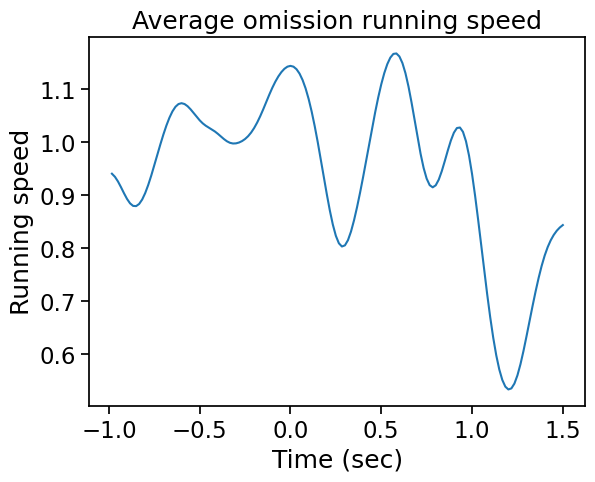

In [28]:
plt.plot(mdf.trace_timestamps.values[0], mdf.mean_trace.mean())
plt.xlabel('Time (sec)')
plt.ylabel('Running speed')
plt.title('Average omission running speed')